# 20.5 Projekt końcowy

#### Import niezbędnych bibliotek i wyłącznie warnings

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.pipeline import Pipeline
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, f1_score, roc_auc_score, make_scorer
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
import warnings
warnings.filterwarnings('ignore')

#### Wczytanie danych z pliku default_of_credit_card_clients.xls

In [2]:
dataframe = pd.read_excel('default_of_credit_card_clients.xls', header=1)
dataframe

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,29996,220000,1,3,1,39,0,0,0,0,...,88004,31237,15980,8500,20000,5003,3047,5000,1000,0
29996,29997,150000,1,3,2,43,-1,-1,-1,-1,...,8979,5190,0,1837,3526,8998,129,0,0,0
29997,29998,30000,1,2,2,37,4,3,2,-1,...,20878,20582,19357,0,0,22000,4200,2000,3100,1
29998,29999,80000,1,3,1,41,1,-1,0,0,...,52774,11855,48944,85900,3409,1178,1926,52964,1804,1


### OPIS POSZCZEGÓLNYCH KOLUMN 
#### This research employed a binary variable, default payment (Yes = 1, No = 0), as the response variable. This study reviewed the literature and used the following 23 variables as explanatory variables:
#### X1: Amount of the given credit (NT dollar): it includes both the individual consumer credit and his/her family (supplementary) credit.
#### X2: Gender (1 = male; 2 = female).
#### X3: Education (1 = graduate school; 2 = university; 3 = high school; 4 = others).
#### X4: Marital status (1 = married; 2 = single; 3 = others).
#### X5: Age (year).
#### X6 - X11: History of past payment. We tracked the past monthly payment records (from April to September, 2005) as follows: X6 = the repayment status in September, 2005; X7 = the repayment status in August, 2005; . . .;X11 = the repayment status in April, 2005. The measurement scale for the repayment status is: -1 = pay duly; 1 = payment delay for one month; 2 = payment delay for two months; . . .; 8 = payment delay for eight months; 9 = payment delay for nine months and above.
#### X12-X17: Amount of bill statement (NT dollar). X12 = amount of bill statement in September, 2005; X13 = amount of bill statement in August, 2005; . . .; X17 = amount of bill statement in April, 2005.
#### X18-X23: Amount of previous payment (NT dollar). X18 = amount paid in September, 2005; X19 = amount paid in August, 2005; . . .;X23 = amount paid in April, 2005.

#### Weryfikacja czy w dataframe znajdują się brakujące dane

In [3]:
dataframe.isnull().mean()*100

ID                            0.0
LIMIT_BAL                     0.0
SEX                           0.0
EDUCATION                     0.0
MARRIAGE                      0.0
AGE                           0.0
PAY_0                         0.0
PAY_2                         0.0
PAY_3                         0.0
PAY_4                         0.0
PAY_5                         0.0
PAY_6                         0.0
BILL_AMT1                     0.0
BILL_AMT2                     0.0
BILL_AMT3                     0.0
BILL_AMT4                     0.0
BILL_AMT5                     0.0
BILL_AMT6                     0.0
PAY_AMT1                      0.0
PAY_AMT2                      0.0
PAY_AMT3                      0.0
PAY_AMT4                      0.0
PAY_AMT5                      0.0
PAY_AMT6                      0.0
default payment next month    0.0
dtype: float64

#### Weryfikacja czy w dataframe znajdują się duplikaty

In [4]:
dataframe.duplicated().any()

False

#### Sprawdzenie typu danych dla poszczególnych kolumn

In [5]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   ID                          30000 non-null  int64
 1   LIMIT_BAL                   30000 non-null  int64
 2   SEX                         30000 non-null  int64
 3   EDUCATION                   30000 non-null  int64
 4   MARRIAGE                    30000 non-null  int64
 5   AGE                         30000 non-null  int64
 6   PAY_0                       30000 non-null  int64
 7   PAY_2                       30000 non-null  int64
 8   PAY_3                       30000 non-null  int64
 9   PAY_4                       30000 non-null  int64
 10  PAY_5                       30000 non-null  int64
 11  PAY_6                       30000 non-null  int64
 12  BILL_AMT1                   30000 non-null  int64
 13  BILL_AMT2                   30000 non-null  int64
 14  BILL_A

#### Wstępna analiza poszczególnych kolumn
#### Widać na tym etapie że wartości max i min dla kolumny MARRIAGE oraz kolumny EDUCTION przyjmują inne wartości niż w opisie. 

In [6]:
dataframe.describe()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,15000.500000,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,...,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,8660.398374,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,...,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,1.000000,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,7500.750000,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,15000.500000,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,...,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,22500.250000,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,...,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,30000.000000,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


#### Żeby podjąć decyzję o ich dalszym procesowaniu najpierw należy przeanalizować strukturę etykiet
#### etykiety dla "0" i "1" nie są dobrze zbalansowane. "1" stanowią jedynie ok 22% wszytskich danych i bedzie to jednym z głównych wyzwań dla tej klasyfikacji
#### Należy więc unikać sytuacji w której zbiór labels "1" zostałby jeszcze bardziej uszczuplany, gdzyż modele będą potrzebować tych danych do bardziej efektywnego działania

default payment next month
0    23364
1     6636
Name: count, dtype: int64


<Axes: xlabel='default payment next month'>

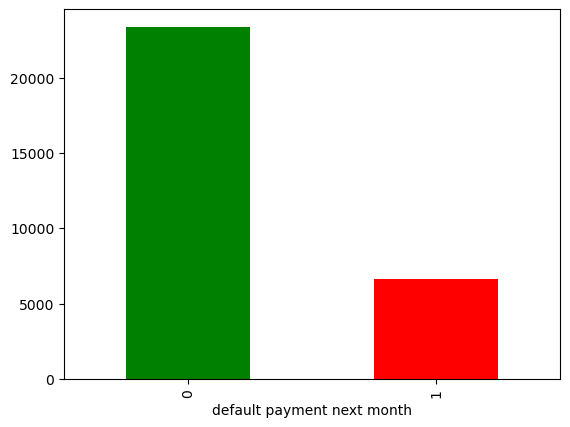

In [7]:
print(dataframe['default payment next month'].value_counts())
CountDefault = pd.Series(dataframe['default payment next month']).value_counts()
CountDefault.plot.bar(color=['green','red'])

#### Dla kolumny EDUCATION widoczne jest 7 grup zamiast zdefiniowanych 4

<Axes: xlabel='EDUCATION'>

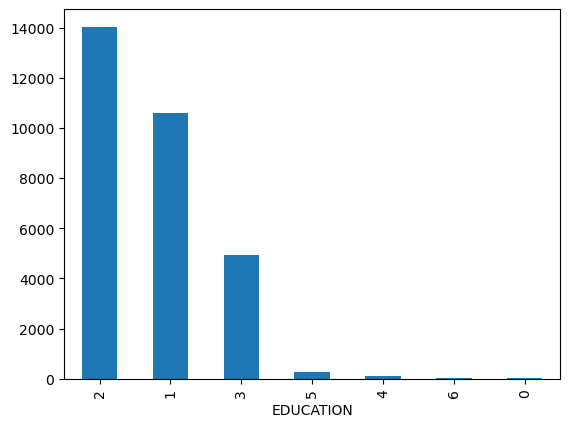

In [8]:
CountEDU = pd.Series(dataframe['EDUCATION']).value_counts()
CountEDU.plot.bar()

#### dzięki analizie kolumny EDUCATION pod względem ilości zawartości labels 0 i 1 dla poszczególnych kategorii, widać iż w dodatkowych błednych grupach znajdują się labels 1. W związku z tym Zostaną one przypisane do kategorii others, jako że jest to gupa do której trafiają wszystkie inne kategorie wykształcenia poza podstawowymi najliczniejszymi 3 kategoriami.   

In [9]:
print("All data from Column:", pd.Series(dataframe['EDUCATION']).value_counts())
print("\nOnly labels '0' from from Column:", pd.Series(dataframe[dataframe['default payment next month']==0]['EDUCATION']).value_counts())
print("\nOnly labels '1' from from Column:", pd.Series(dataframe[dataframe['default payment next month']==1]['EDUCATION']).value_counts())

All data from Column: EDUCATION
2    14030
1    10585
3     4917
5      280
4      123
6       51
0       14
Name: count, dtype: int64

Only labels '0' from from Column: EDUCATION
2    10700
1     8549
3     3680
5      262
4      116
6       43
0       14
Name: count, dtype: int64

Only labels '1' from from Column: EDUCATION
2    3330
1    2036
3    1237
5      18
6       8
4       7
Name: count, dtype: int64


#### Podobnie wygląda sytuacja dla kolumny MARRIAGE z tym że mamy tylko jedną dodatkową kategorię nie uwzględnioną w opisie. Postępowanie jest analogiczne jak powyżej 

<Axes: xlabel='MARRIAGE'>

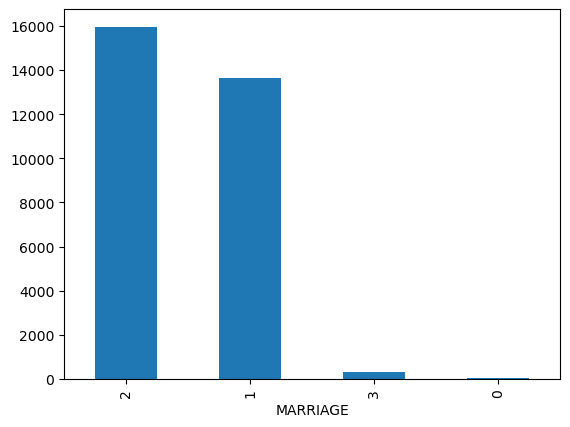

In [10]:
CountMAR = pd.Series(dataframe['MARRIAGE']).value_counts()
CountMAR .plot.bar()

In [11]:
print("All data from Column:", pd.Series(dataframe['MARRIAGE']).value_counts())
print("\nOnly labels '0' from from Column:", pd.Series(dataframe[dataframe['default payment next month']==0]['MARRIAGE']).value_counts())
print("\nOnly labels '1' from from Column:", pd.Series(dataframe[dataframe['default payment next month']==1]['MARRIAGE']).value_counts())

All data from Column: MARRIAGE
2    15964
1    13659
3      323
0       54
Name: count, dtype: int64

Only labels '0' from from Column: MARRIAGE
2    12623
1    10453
3      239
0       49
Name: count, dtype: int64

Only labels '1' from from Column: MARRIAGE
2    3341
1    3206
3      84
0       5
Name: count, dtype: int64


#### Dla kolumn AAGE oraz LIMIT_BAL które zawierają dane numeryczne moznawykonać wizualizację  w postaci estymacji gestości rozkładu dla labels 1 oraz labels 0 na jednym wykresie.
#### Na poniższym wykresie dla AGE widać, że gęstość rozkładów jest rózną dla labels 0 i 1 w zalezności od wieku, może by to pomocne podczas ucenia klasyfikatorów.

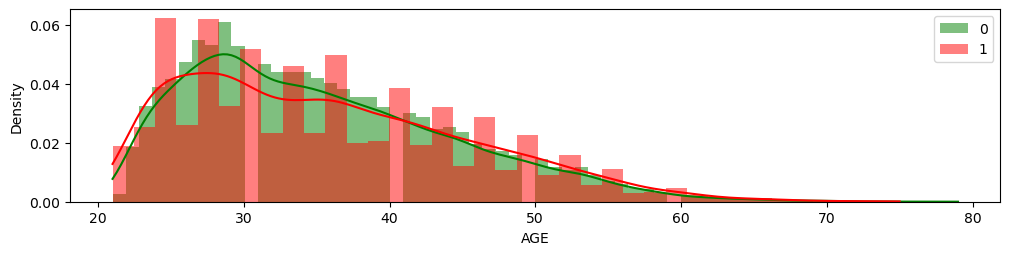

In [12]:
    plt.figure(figsize=(12, 2.5))
    sns.histplot(dataframe.loc[dataframe['default payment next month']==0, 'AGE'], kde=True, stat="density", linewidth=0,color='green', label='0')
    sns.histplot(dataframe.loc[dataframe['default payment next month']==1, 'AGE'], kde=True, stat="density", linewidth=0, color='red', label='1')
    plt.legend(loc='upper right')
    plt.show()

#### Róznież na podstawie limitu przynanego kredytu widać że gędtość rozkładu różna dla labels 1 oraz 0 szczególnie w przypadku niższych kwot. 

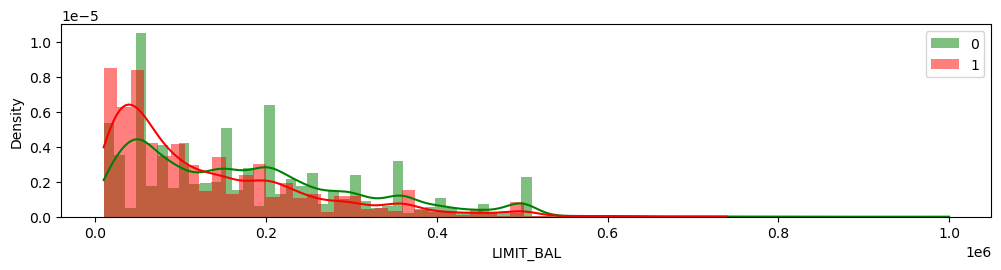

In [13]:
    plt.figure(figsize=(12, 2.5))
    sns.histplot(dataframe.loc[dataframe['default payment next month']==0, 'LIMIT_BAL'], kde=True, stat="density", linewidth=0, color='green', label='0')
    sns.histplot(dataframe.loc[dataframe['default payment next month']==1, 'LIMIT_BAL'], kde=True, stat="density", linewidth=0, color='red', label='1')
    plt.legend(loc='upper right')
    plt.show()

#### Jako ostatni etap wstępnej analizy zostanie sprawzona korelacja dla danych numerycznych pod kątem mozliwości zastosowania PCA. 
#### Jak widać na poniższej matrycy istnieją silne korelacje dla  danych BIL_AMT. 

In [14]:
column_names = dataframe.columns.tolist()
non_corr_features = ['SEX','EDUCATION','MARRIAGE','ID', 'default payment next month']
correlation_data = [num_f for num_f in column_names if num_f not in non_corr_features]

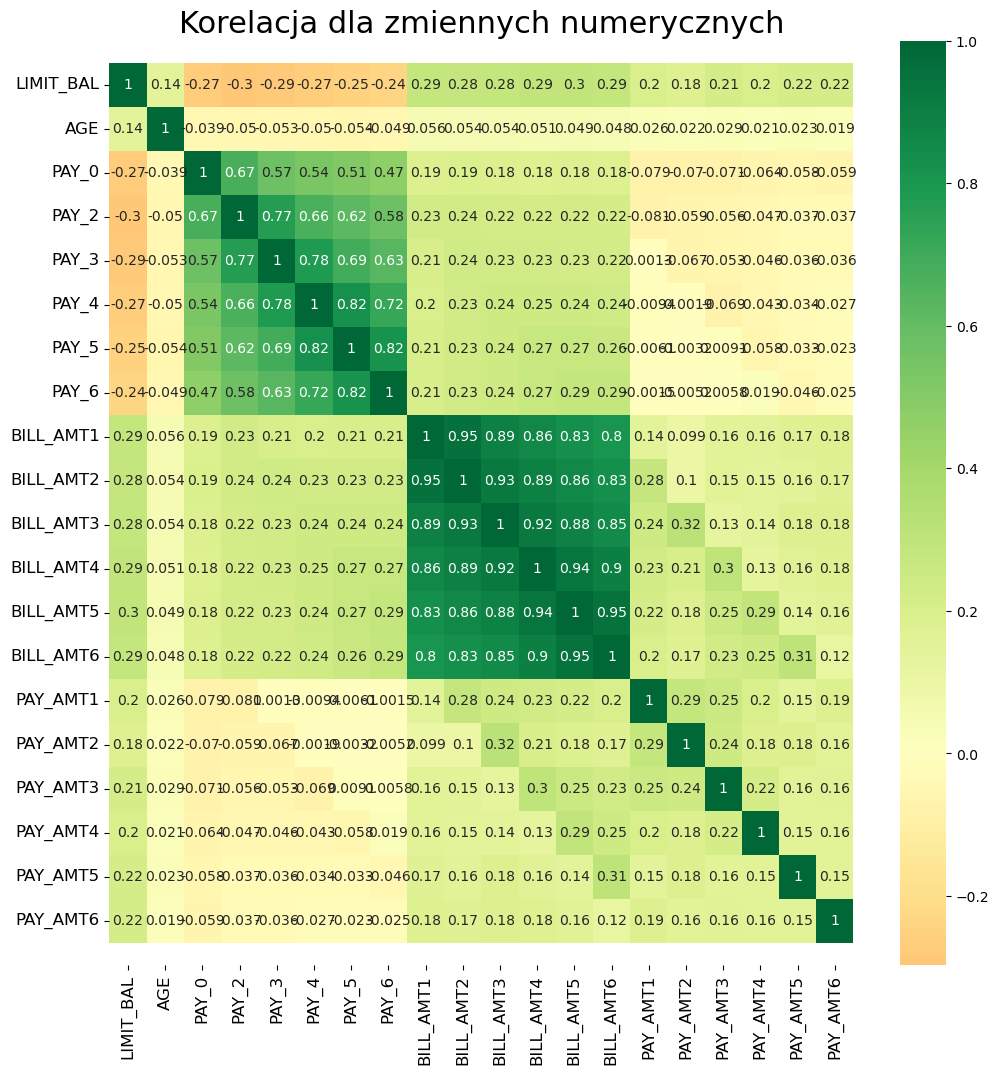

In [15]:
plt.figure(figsize=(12, 12))
ax = sns.heatmap(dataframe[correlation_data].corr(),
                 xticklabels=dataframe[correlation_data].corr().columns,
                 yticklabels=dataframe[correlation_data].columns,
                 cmap='RdYlGn',
                 center=0,
                 annot=True)

plt.title('Korelacja dla zmiennych numerycznych', fontsize=22)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

#### Kolumna ID nie wnosi żadnej użytecznej informacji więc zostaje usunięta

In [16]:
dataframe.drop(['ID'], axis=1, inplace=True)

#### Zostaje wykonane przypisanie danych do X i y oraz rozdzielenie zbioru na testowy i treningowy. Stratyfikacja w przypadku niezbalansowanych klas jest wyjątkowo ważna. 

In [17]:
X = dataframe.drop(['default payment next month'], axis=1).copy()
y = dataframe['default payment next month'].copy()

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

#### Zostają stworzone 2 klasy które w pipeline będa odpowiedzialne z modyfikacje w kolumnie EDUCATION oraz MARRIAGE, zgodnie z przeprowadzoną wcześniej analizą.

In [19]:
class Filter_Education(BaseEstimator, TransformerMixin):
    def __init__(self, column):
        self.column = column

    def fit(self, X, y = None ):
        return self

    def transform(self, X, y = None ):
        X_transformed = X.copy()
        column = self.column
        X_transformed.loc[~X_transformed[column].isin([1, 2, 3, 4]), column] = 4
        return X_transformed

In [20]:
class Filter_Marriage(BaseEstimator, TransformerMixin):
    def __init__(self, column):
        self.column = column

    def fit(self, X, y = None ):
        return self

    def transform(self, X, y = None ):
        X_transformed = X.copy()
        column = self.column
        X_transformed.loc[~X_transformed[column].isin([1, 2, 3 ]), column] = 3
        return X_transformed

#### Definicja funkcji dla wyswietlania wyników i ich agregacji do jednej tabeli

In [21]:
def result_summary(classifier_name, predict_test,metrics_df):
    report = classification_report(y_test, predict_test, output_dict=True)
    metrics_df = pd.concat([metrics_df, pd.DataFrame.from_dict({'Classifier': [classifier_name], 
                                                                'Class': ['0'], 
                                                                'Precision': [report['0']['precision']],
                                                                'Recall': [report['0']['recall']],
                                                                'F1-score': [report['0']['f1-score']]
                                                                })])
    metrics_df = pd.concat([metrics_df, pd.DataFrame.from_dict({'Classifier': [classifier_name], 
                                                                'Class': ['1'], 
                                                                'Precision': [report['1']['precision']],
                                                                'Recall': [report['1']['recall']],
                                                                'F1-score': [report['1']['f1-score']]
                                                                })])
    print(classification_report(y_test, predict_test))
    cm = confusion_matrix(y_test, predict_test)
    ax = sns.heatmap(cm, annot=True, cmap='Blues', fmt='.0f')
    ax.set_title('Confusion Matrix\n\n')
    ax.set_xlabel('\nPredicted Values')
    ax.set_ylabel('Actual Values ')
    plt.show()
    return metrics_df

#### Definicja które dane będziemy traktowac jako numeryczne a które jako kategoryczne (pod kątem użycia OneHotEncodera)


In [22]:
column_names = X.columns.tolist()
cat_features = ['SEX','EDUCATION','MARRIAGE']
num_features = [num_f for num_f in column_names if num_f not in cat_features]
metrics_df = pd.DataFrame(columns = ['Classifier', 'Class', 'Precision', 'Recall','F1-score'])

## Wybór sposobu oceny modelu. 

#### Założenienie jest iż oszustwa (klasa 1) są rzadkim zjawiskiem, więc odpowiedni wybór efektywności modelu w tym wypadku jest bardzo ważny. Do dyspozycji jest: precision - mówi o dokładności przeidywań dla klasy oszustw, Recall określa zdolność modelu do wykrycia wszystkich przypadków klasy pozytywnej, oraz F1 Score która jest harmoniczną średnią Precision i recall.
#### Zakładamy ze priorytetem jest zminimalizowanie liczby False Negatives, czyli sytuacji gdy oszustwo nie zostanie przewidziane. Taka sytuacja prowadzi do najbardziej dotkliwych strat. Recall jest kluczowa ponieważ zalezy nam na wykryciu jak największej liczby rzeczywistych oszustw. Do pewnego momentu nawet kosztem liczby False Positive. Dopuszczalne jest więc poświęcenie do pewnego stopnia precyzji by osiągnąć wyższy recall. Jednak zbyt niski precision bedzie powodował traktowanie klientów którzy nie są oszutami jako oszustów, więc potencjalny zysk który można dzięki nim osiągnąć zostanie zapszepaszczony. 
#### Dobrym rozwiązaniem dla tego problemu może być F1 Score który jest pewnym kompromisem pomiedzy Recall a Precision
#### Do optymalizacji modelów użyjemy więc F1 Score i bedziemy monitorować ten wskaźnik jak i Precision i Recall (zarówno dla klasy 1 jak i 0) 

## Wybór najskuteczniejszych klasyfikatorów  dla klasyfikacji binernej przy niezbalansowanych klasach

#### Logistic regression prosty model, który umożliwia balanowanie niezbalanowanych klas za pomocą class_weight
#### SVM Jest to model który będzie się skupiał na maksymalizacji marginesu między klasami, co może poprawić klasyfikację mniejszościowej klasy. Ma również parametr class_weight który można użyć do wyrównania wpływu klas niezbalansowanych.
#### KNN wykorzystuje lokalne sąsiedztwo do klasyfikacji, niezbalansowana klasa bedzie wymagać optymalizacji liczby sąsiadów lub zmiany miary odległości
#### Random Forest - dzieki możliwości próbkowania z powtórzeniem dobrze radzi sobie z małymi zbiorami danych mniejszościowych. Ma również parametr class_weight dla klasy mniejszościowej
#### CGBoost jest to wydajny algorytm wzmocnienia gradientowego, naturalnie odporny na niezbalansowanie. Parametr scale_pos_weight może być użyty do równoważenia klas podczas treningu 

### LogisticRegression Classifier

In [23]:
num_preparation = Pipeline(steps=[
    ('fill_missings', SimpleImputer(strategy='mean')),
    ('scaler_1', StandardScaler()),
    ('pca', PCA(n_components=0.96)),
    ('scaler_2', StandardScaler()),
                                 ])

cat_preparation = Pipeline(steps=[
    ('filter_education', Filter_Education(column='EDUCATION')),
    ('filter_marriage', Filter_Marriage(column='MARRIAGE')),
    ('encoder', OneHotEncoder(sparse_output=False ,handle_unknown='ignore'))
])

data_preparation = ColumnTransformer(transformers=[
    ('numeric_preprocessing', num_preparation, num_features),
    ('categorical_preprocessing', cat_preparation, cat_features)
])

model_pipeline_v2 = Pipeline(steps=[('preprocessor', data_preparation),
                                    ('model', LogisticRegression(class_weight='balanced',  max_iter=10000))])

Fitting 5 folds for each of 48 candidates, totalling 240 fits
Best Hyperparameters: {'model__C': 0.01, 'model__penalty': 'l2', 'model__solver': 'sag', 'preprocessor__numeric_preprocessing__pca__n_components': 0.995}
              precision    recall  f1-score   support

           0       0.87      0.70      0.77      4673
           1       0.37      0.63      0.47      1327

    accuracy                           0.68      6000
   macro avg       0.62      0.66      0.62      6000
weighted avg       0.76      0.68      0.71      6000



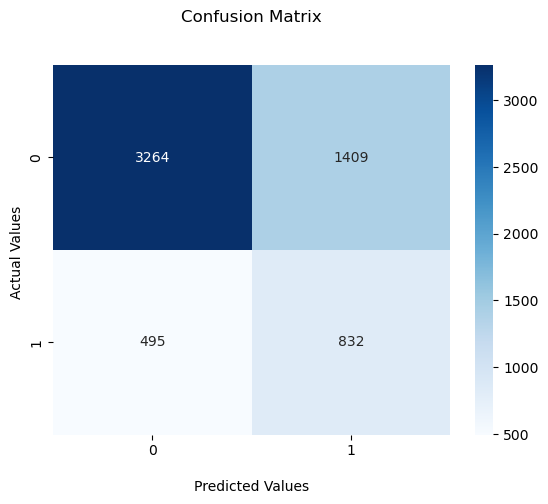

In [24]:
params = {
    'preprocessor__numeric_preprocessing__pca__n_components': [0.94, 0.96, 0.995],
    'model__C': [0.01, 0.1, 0.5, 1],
    'model__penalty': ['l2', None],
    'model__solver': ['sag', 'saga']
}

grid_search = GridSearchCV(model_pipeline_v2, 
                           params, 
                           cv=5, 
                           n_jobs=-1, 
                           verbose=2, 
                           scoring=make_scorer(f1_score, pos_label=1)
                          )

grid_search.fit(X_train, y_train)
print("Best Hyperparameters:", grid_search.best_params_)
model_pipeline_LogReg = grid_search.best_estimator_
metrics_df = result_summary("LogisticRegression", model_pipeline_LogReg.predict(X_test), metrics_df)

## SVM Classifier

In [25]:
num_preparation = Pipeline(steps=[
    ('fill_missings', SimpleImputer(strategy='mean')),
    ('scaler_1', StandardScaler()),
    ('pca', PCA()),
    ('scaler_2', StandardScaler()),
                                 ])

cat_preparation = Pipeline(steps=[
    ('filter_education', Filter_Education(column='EDUCATION')),
    ('filter_marriage', Filter_Marriage(column='MARRIAGE')),
    ('encoder', OneHotEncoder(sparse_output=False ,handle_unknown='ignore'))
])

data_preparation = ColumnTransformer(transformers=[
    ('numeric_preprocessing', num_preparation, num_features),
    ('categorical_preprocessing', cat_preparation, cat_features)
])

model_pipeline_v2 = Pipeline(steps=[('preprocessor', data_preparation),
                                    ('model', SVC(class_weight='balanced', kernel='poly', gamma='scale'))])

Fitting 4 folds for each of 9 candidates, totalling 36 fits
Best Hyperparameters: {'model__C': 0.5, 'preprocessor__numeric_preprocessing__pca__n_components': 0.96}
              precision    recall  f1-score   support

           0       0.87      0.84      0.85      4673
           1       0.50      0.54      0.52      1327

    accuracy                           0.78      6000
   macro avg       0.68      0.69      0.69      6000
weighted avg       0.78      0.78      0.78      6000



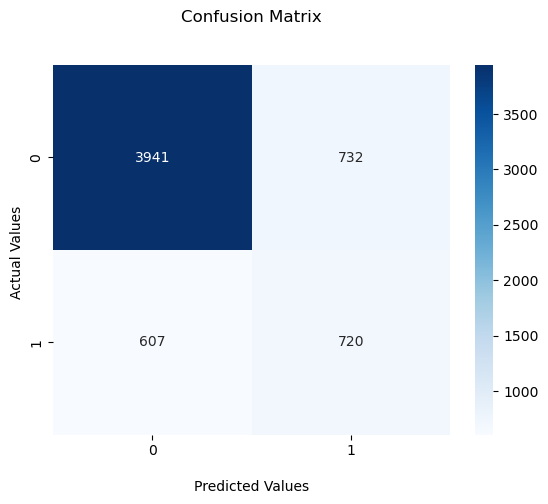

In [26]:
params = {
    'preprocessor__numeric_preprocessing__pca__n_components': [0.9, 0.96, 0.98],
    'model__C': [0.01, 0.5, 1]   
}

grid_search = GridSearchCV(model_pipeline_v2, 
                           params, 
                           cv=4, 
                           n_jobs=-1, 
                           verbose=2, 
                           scoring = make_scorer(f1_score, pos_label=1)
                          )

grid_search.fit(X_train, y_train)
print("Best Hyperparameters:", grid_search.best_params_)
model_pipeline_SVM = grid_search.best_estimator_
metrics_df = result_summary("SVM", model_pipeline_SVM.predict(X_test), metrics_df)

## KNN Classifier 

In [27]:
num_preparation = Pipeline(steps=[
    ('fill_missings', SimpleImputer(strategy='mean')),
    ('scaler_1', StandardScaler()),
    ('pca', PCA()),
    ('scaler_2', StandardScaler()),
                                 ])

cat_preparation = Pipeline(steps=[
    ('filter_education', Filter_Education(column='EDUCATION')),
    ('filter_marriage', Filter_Marriage(column='MARRIAGE')),
    ('encoder', OneHotEncoder(sparse_output=False ,handle_unknown='ignore'))
])

data_preparation = ColumnTransformer(transformers=[
    ('numeric_preprocessing', num_preparation, num_features),
    ('categorical_preprocessing', cat_preparation, cat_features)
])

model_pipeline_v2 = Pipeline(steps=[('preprocessor', data_preparation),
                                    ('model', KNeighborsClassifier(weights='distance'))])

Fitting 5 folds for each of 108 candidates, totalling 540 fits
Best Hyperparameters: {'model__metric': 'minkowski', 'model__n_neighbors': 15, 'model__weights': 'distance', 'preprocessor__numeric_preprocessing__pca__n_components': 0.96}
              precision    recall  f1-score   support

           0       0.84      0.94      0.89      4673
           1       0.63      0.36      0.46      1327

    accuracy                           0.81      6000
   macro avg       0.73      0.65      0.67      6000
weighted avg       0.79      0.81      0.79      6000



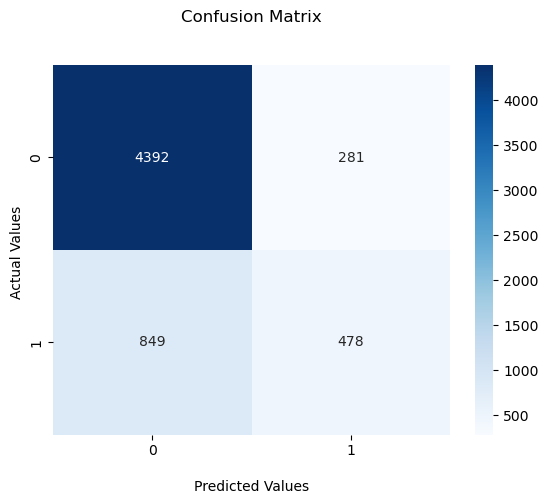

In [28]:
params = {
    'preprocessor__numeric_preprocessing__pca__n_components': [0.94, 0.96, 0.98],
    'model__n_neighbors': [7, 11, 15, 19, 22, 30], 
    'model__weights': ['uniform', 'distance'],                
    'model__metric': ['minkowski',  'euclidean', 'manhattan']
}

grid_search = GridSearchCV(model_pipeline_v2, 
                           params, 
                           cv=5, 
                           n_jobs=-1, 
                           verbose=2, 
                           scoring = make_scorer(f1_score, pos_label=1)
                          )

grid_search.fit(X_train, y_train)
print("Best Hyperparameters:", grid_search.best_params_)
model_v3 = grid_search.best_estimator_
model_pipeline_KNN = grid_search.best_estimator_
metrics_df = result_summary("KNN", model_pipeline_KNN.predict(X_test), metrics_df)

## Pipeline fo RandomForestClassifier and XGBoost

In [29]:
num_preparation = Pipeline(steps=[
    ('fill_missings', SimpleImputer(strategy='mean'))
                                 ])

cat_preparation = Pipeline(steps=[
    ('filter_education', Filter_Education(column='EDUCATION')),
    ('filter_marriage', Filter_Marriage(column='MARRIAGE')),
    ('encoder', OneHotEncoder(sparse_output=False ,handle_unknown='ignore'))
])

data_preparation = ColumnTransformer(transformers=[
    ('numeric_preprocessing', num_preparation, num_features),
    ('categorical_preprocessing', cat_preparation, cat_features)
])

model_pipeline_v2 = Pipeline(steps=[('preprocessor', data_preparation)])

X_train_transform = model_pipeline_v2.fit_transform(X_train)
X_test_transform = model_pipeline_v2.transform(X_test)

## Random Forest Classifier

Fitting 5 folds for each of 54 candidates, totalling 270 fits
Best Hyperparameters: {'max_depth': 10, 'min_samples_leaf': 3, 'min_samples_split': 4, 'n_estimators': 95}
              precision    recall  f1-score   support

           0       0.87      0.85      0.86      4673
           1       0.52      0.57      0.54      1327

    accuracy                           0.79      6000
   macro avg       0.69      0.71      0.70      6000
weighted avg       0.79      0.79      0.79      6000



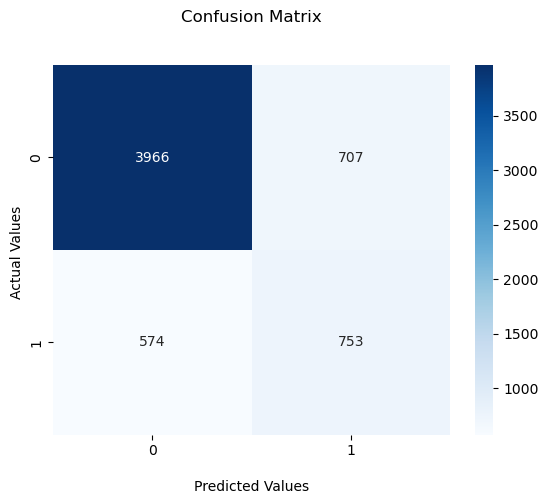

In [30]:
param_grid = {  
    'n_estimators': [50, 95],           
    'max_depth': [None, 5, 10],           
    'min_samples_split': [2, 3, 4],    
    'min_samples_leaf': [1, 3, 4]  
}

grid_search = GridSearchCV(
    estimator=RandomForestClassifier(class_weight= 'balanced'),
    param_grid=param_grid,
    scoring= make_scorer(f1_score, pos_label=1),
    cv=5,
    verbose=2,
    n_jobs=-1
) 

grid_search.fit(X_train_transform, y_train)
print("Best Hyperparameters:", grid_search.best_params_)
model_pipeline_RFC = grid_search.best_estimator_
metrics_df = result_summary("Random Forest", model_pipeline_RFC.predict(X_test_transform), metrics_df)

## XGBoost Classifier

Fitting 5 folds for each of 288 candidates, totalling 1440 fits
Best Hyperparameters: {'colsample_bytree': 0.7, 'learning_rate': 0.03, 'max_depth': 4, 'n_estimators': 95, 'scale_pos_weight': 3.5, 'subsample': 0.8}
              precision    recall  f1-score   support

           0       0.88      0.81      0.85      4673
           1       0.48      0.61      0.54      1327

    accuracy                           0.77      6000
   macro avg       0.68      0.71      0.69      6000
weighted avg       0.79      0.77      0.78      6000



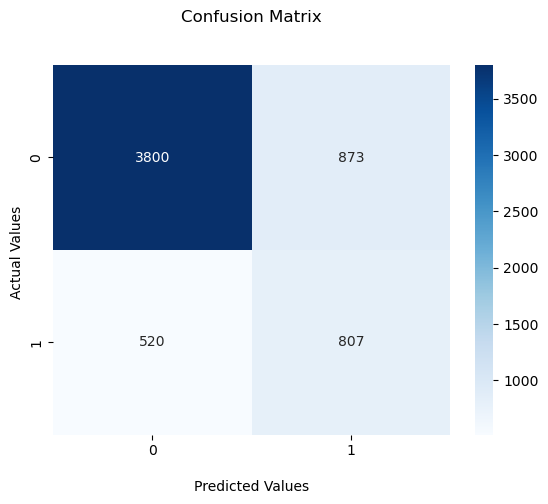

In [31]:
param_grid = {
    'learning_rate': [0.01, 0.03, 0.1 ], 
    'scale_pos_weight': [2, 3.5, 4, 5 ],
    'n_estimators': [50, 95 ],           
    'max_depth': [ 3, 4, 5 ],           
    'subsample': [0.7, 0.8],
    'colsample_bytree': [0.7, 0.8] 
}

grid_search = GridSearchCV(
    estimator=XGBClassifier(objective='binary:logistic'),
    param_grid=param_grid,
    scoring= make_scorer(f1_score, pos_label=1),
    cv=5, 
    verbose=2,
    n_jobs=-1
) 

grid_search.fit(X_train_transform, y_train)
print("Best Hyperparameters:", grid_search.best_params_)
model_pipeline_XGB = grid_search.best_estimator_
metrics_df = result_summary("XGBoost", model_pipeline_XGB.predict(X_test_transform), metrics_df)

## SUMMARY

In [32]:
metrics_df.style.hide(axis="index")

Classifier,Class,Precision,Recall,F1-score
LogisticRegression,0,0.868316,0.698481,0.774194
LogisticRegression,1,0.371263,0.626978,0.466368
SVM,0,0.866535,0.843355,0.854788
SVM,1,0.495868,0.542577,0.518172
KNN,0,0.838008,0.939867,0.886020
KNN,1,0.629776,0.360211,0.458293
Random Forest,0,0.873568,0.848705,0.860957
Random Forest,1,0.515753,0.567445,0.540366
XGBoost,0,0.879630,0.813182,0.845102
XGBoost,1,0.480357,0.608139,0.536748


## Wnioski
#### Najlepszą wartość Recall osiągnał model LogisticRegression (dla klasy 1), niestety zostało to osiągnięte dzięki poświęceniu precyzji, czyli klasyfikacji False Positive. Z drugiej strony model XGBoost siągnął bardzo zbliżony wynik pod wzgledem Recall, lecz by znacznie lepszym Precision. W tym miejscu nalezałoby Rozważyć jakie korzysci i konsekwencjie niesie za sobą niewykrycie oszustwa lub klasyfikacja False positive i na tej podstawie wybranie odpowiedniego klasyfikatora. Również Random Forest oferuje nam dość dobre rozwiazanie, gdyż F1Score ma największą wartość dla niego i co prawda Recall nie jest tak wysoki jak przy XGBoost, ale wartość precision jest wyższa. Jeśli więc poencjalne skutki niewykrycia oszustwa oraz kwalifikacji False Positive byłyby podobne, to własnie ten klasyfikator byłby najlepszą opcją. Klasyfikaror KNN wykonał coś przeciwnego do Logistic regression, czyli zwiekszył precision kosztem Recall i w ten sposób osiągnął max wynik F1Score, ale taka opcja raczej nie będzie interesująca jako rozwiazanie tego problemu. Warto też wspomnieć że KNN dla klasy 0 uzyskał najwyższy wynik F1Score oraz najwyższy Recall, co onacza że najlepiej sklasyfikował klientów którzy nie są oszustami. 

## Dalsze kroki
#### By poprawnie wybrać model należałoby ustalić jakie są konsekwencje nie wykrycia oszystwa lub kwalifikacji False Positive i na podstawie takiej informacji można podjąć decyzję. 
#### Dostarczenie większej ilości danych z operacji oszustw (kategoria 1) pomogłyby w lepszym zbalansowaniu danych i lepszym uczeniu modeli. 